## Assignment 1 - Group 04 - Nichelle Sequeira, Ludovica Fracassi & Emma Kappeler

In [1]:
# Import needed modules 
# numpy will be used to convert lists to arrays and to use log, exp and fitting functions
import numpy as np 
# matplotlib will be used for plotting
import matplotlib.pyplot as plt
import os

#### After the researcher did the fitting, she obtained the following values:
    qsat = 4.72 mmol/g
    k(263) = 6.75e-06 1/Pa
    k(303) = 1.48e-06 1/Pa
    k(343) = 5.16e-07 1/Pa

Slope: 2905.4431 ± 46.4803
Intercept: -22.9712 ± 0.1561
R²: 0.9992
ΔH (Heat of Absorption): -24155.9 J/mol
k0 (Standard equilibrium constant): 1.056e-10


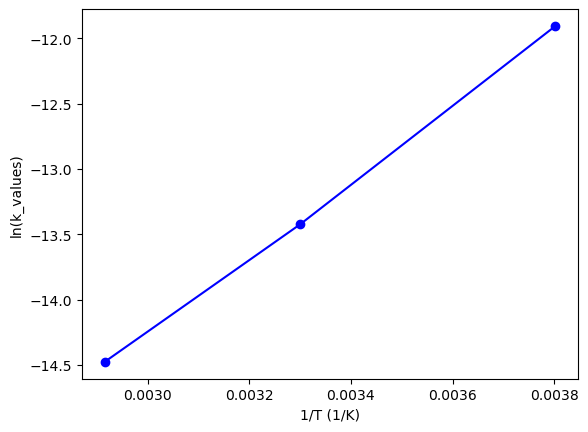

In [9]:
# # Group the temperatures and K values in arrays

temperatures = np.array([263, 303, 343])
k_values = np.array([6.75e-06, 1.48e-06, 5.16e-07])

# # We know that we need to plot lnk vs. 1/T

ln_k_values = np.log(k_values)
inverse_T = 1 / temperatures

# # Plot of lnk vs. 1/T

plt.plot(inverse_T, ln_k_values, marker='o', linestyle='-', color='b')


# # Solve for the unknowns by linear fitting

# Calculate the number of data points
n = len(inverse_T)

# Calculate the sums needed for the regression
sum_x = np.sum(inverse_T)
sum_y = np.sum(ln_k_values)
sum_xx = np.sum(inverse_T**2)
sum_xy = np.sum(inverse_T * ln_k_values)

# Calculate slope (m) and intercept (b)
slope = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x**2)
intercept = (sum_y - slope * sum_x) / n

# Calculate predictions and residuals
ln_k_fit = intercept + slope * inverse_T
residuals = ln_k_values - ln_k_fit

# Calculate R-squared
ss_total = np.sum((ln_k_values - np.mean(ln_k_values))**2)
ss_residual = np.sum(residuals**2)
r_squared = 1 - (ss_residual / ss_total)

# Calculate standard deviations of the slope and intercept
std_error = np.sqrt(ss_residual / (n - 2))
slope_std = std_error / np.sqrt(n * np.sum((inverse_T - np.mean(inverse_T))**2))
intercept_std = slope_std * np.sqrt(np.sum(inverse_T**2) / n)

# Constants
R = 8.314  # J/(mol·K)

# Calculate ΔH and k0
delta_H = -R * slope  
k0 = np.exp(intercept)  


# # Print the results

print(f"Slope: {slope:.4f} ± {slope_std:.4f}")
print(f"Intercept: {intercept:.4f} ± {intercept_std:.4f}")
print(f"R²: {r_squared:.4f}")
print(f"ΔH (Heat of Absorption): {round(delta_H, 1):.1f} J/mol")
print(f"k0 (Standard equilibrium constant): {k0:.3e}")




# Label the axes
plt.xlabel('1/T (1/K)')
plt.ylabel('ln(k_values)')

# Show the plot
plt.show()

In [4]:
# Calculating the Henry's coefficients
qsat = 4.72  # mmol/g

# Remember the formula for Kh (mmol/(g.Pa))
k_values = np.array([6.75e-06, 1.48e-06, 5.16e-07])  # 1/Pa
k_values_multiplied = k_values * qsat

#print the results
print("Henry Coefficients at 263K 303K 343K")
print(k_values_multiplied)

Henry Coefficients at 263K 303K 343K
[3.18600e-05 6.98560e-06 2.43552e-06]
